In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('RFM_visualize.csv')
# Print the DataFrame
print(df)

        CustomerID  Recency  Frequency  Monetary  R  F  M  RFM  \
0            71739       62       0.14     15000  2  1  2  212   
1            72014       62       0.29     36299  2  2  2  222   
2            72052       31       0.14     20714  3  1  2  312   
3            72657       62       0.14     28571  2  1  2  212   
4            74549       62       0.14     17857  2  1  2  212   
...            ...      ...        ...       ... .. .. ..  ...   
931949     4356109       15       0.11      3763  4  1  1  411   
931950     4356111       15       0.11      3763  4  1  1  411   
931951     4356116       15       0.11      3763  4  1  1  411   
931952     4356133       15       0.25      8468  4  2  1  421   
931953     4356165       15       0.50     16936  4  3  2  432   

            Segmentation  
0            Hibernating  
1                At risk  
2             Promissing  
3            Hibernating  
4            Hibernating  
...                  ...  
931949  Recent Cus

In [4]:
df_mean = df[['F','R','Monetary']].groupby(['R', 'F']).mean()
print(df_mean)

          Monetary
R F               
1 1    8017.394540
  2   23908.403069
  3   41906.964296
  4   85355.284564
2 1    7928.680775
  2   23836.313162
  3   39762.763564
  4   81549.181633
3 1    6947.091154
  2   24428.943517
  3   44189.146377
  4  100903.771609
4 1    6159.426888
  2   17297.663626
  3   31701.749571
  4   81243.311569


In [5]:
collect = df_mean.groupby('R').Monetary.apply(list)
print(collect)

R
1    [8017.394540486995, 23908.403069340904, 41906....
2    [7928.680774603581, 23836.313162225757, 39762....
3    [6947.091154486823, 24428.943516893374, 44189....
4    [6159.426888426889, 17297.66362631288, 31701.7...
Name: Monetary, dtype: object


In [6]:
data = []
for i in collect:
    print(i)
    data.append(i)
print(data)

[8017.394540486995, 23908.403069340904, 41906.96429589509, 85355.28456413104]
[7928.680774603581, 23836.313162225757, 39762.76356361969, 81549.18163282119]
[6947.091154486823, 24428.943516893374, 44189.146377295496, 100903.77160945938]
[6159.426888426889, 17297.66362631288, 31701.749571183533, 81243.31156930127]
[[8017.394540486995, 23908.403069340904, 41906.96429589509, 85355.28456413104], [7928.680774603581, 23836.313162225757, 39762.76356361969, 81549.18163282119], [6947.091154486823, 24428.943516893374, 44189.146377295496, 100903.77160945938], [6159.426888426889, 17297.66362631288, 31701.749571183533, 81243.31156930127]]


[[  8017.39454049  23908.40306934  41906.9642959   85355.28456413]
 [  7928.6807746   23836.31316223  39762.76356362  81549.18163282]
 [  6947.09115449  24428.94351689  44189.1463773  100903.77160946]
 [  6159.42688843  17297.66362631  31701.74957118  81243.3115693 ]]
label 8017 in box
label 23908 in box
label 41906 in box
label 85355 in box
label 7928 in box
label 23836 in box
label 39762 in box
label 81549 in box
label 6947 in box
label 24428 in box
label 44189 in box
label 100903 in box
label 6159 in box
label 17297 in box
label 31701 in box
label 81243 in box


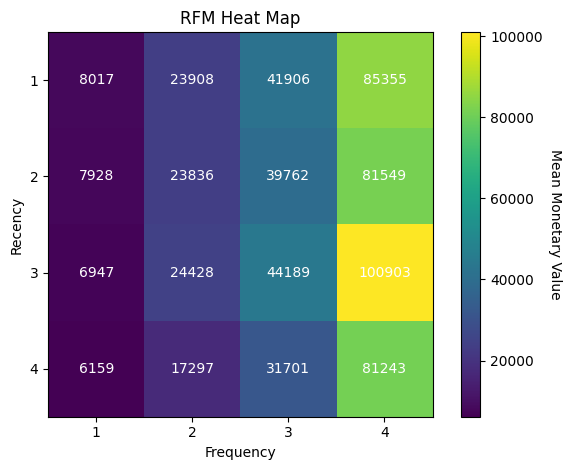

In [16]:

_f = df['F'].drop_duplicates().sort_values()
_r = df['R'].drop_duplicates().sort_values(ascending=True)

harvest = np.array(data)
print(harvest)

fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(_f)), labels=_f)
ax.set_yticks(np.arange(len(_r)), labels=_r)

# Add titles for x and y axes
ax.set_xlabel("Frequency")
ax.set_ylabel("Recency")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax, cmap="YlGn")
cbar.ax.set_ylabel("Mean Monetary Value", rotation=-90, va="bottom")
# Loop over data dimensions and create text annotations.
for i in range(len(_r)):
    for j in range(len(_f)):
        print("label {} in box".format(int(harvest[i, j])))
        text = ax.text(j, i, int(harvest[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("RFM Heat Map")
fig.tight_layout()
plt.show()